# ANÁLISIS DE DATOS
# Unidad 3 - Tarea 4 - Algoritmos de Aprendizaje no supervisado

Rony Mena Curvelo

Estudiante

Grupos: 202016908_92

UNAD


# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler

#
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

dataset = pd.read_csv("Mall_Customers.csv")


EDA

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
dataset.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
#Estadistica de Generos identificados en dataset
dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

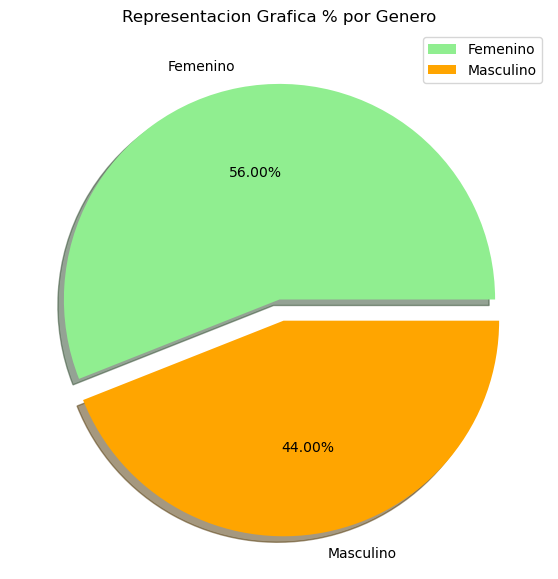

In [9]:
# Representacion Grafica % por Genero
labels = ['Femenino', 'Masculino']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Representacion Grafica % por Genero')
plt.axis('off')
plt.legend()
plt.show()

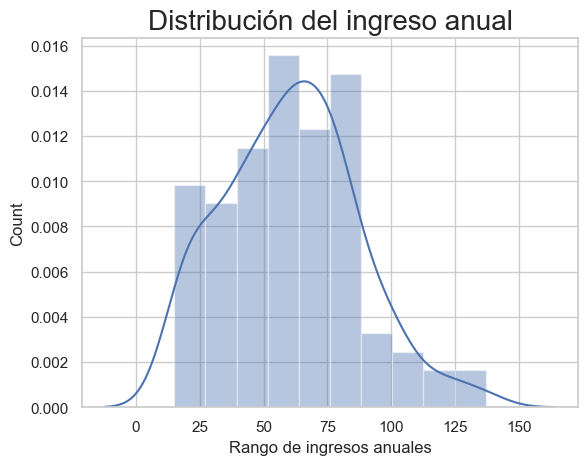

In [14]:
# Distribución del ingreso anual
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribución del ingreso anual', fontsize = 20)
plt.xlabel('Rango de ingresos anuales')
plt.ylabel('Count')
plt.show()

In [17]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:

1. Annual Income (k$)

2. Spending Score (1-100)

3. Age

In [16]:
# Filtrar columnas del modelo 

dataset = dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]
dataset.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [18]:
dataset.dropna()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [88]:
#sns.pairplot(dataset)

sns.pairplot(dataset.dropna(), size=3,kind='scatter')

In [90]:
# Matriz de correlación
corr_matrix = dataset.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [389]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=dataset)

<Axes: >

In [387]:
# Revisión de los datos de las variables objetivo

dataset.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster6,Cluster7
0,19,15,39,2,5,2
1,21,15,81,2,2,5
2,20,16,6,0,5,2
3,23,16,77,2,2,5
4,31,17,40,0,5,2
5,22,17,76,2,2,5
6,35,18,6,0,5,2
7,23,18,94,2,2,5
8,64,19,3,0,5,2
9,30,19,72,2,2,5


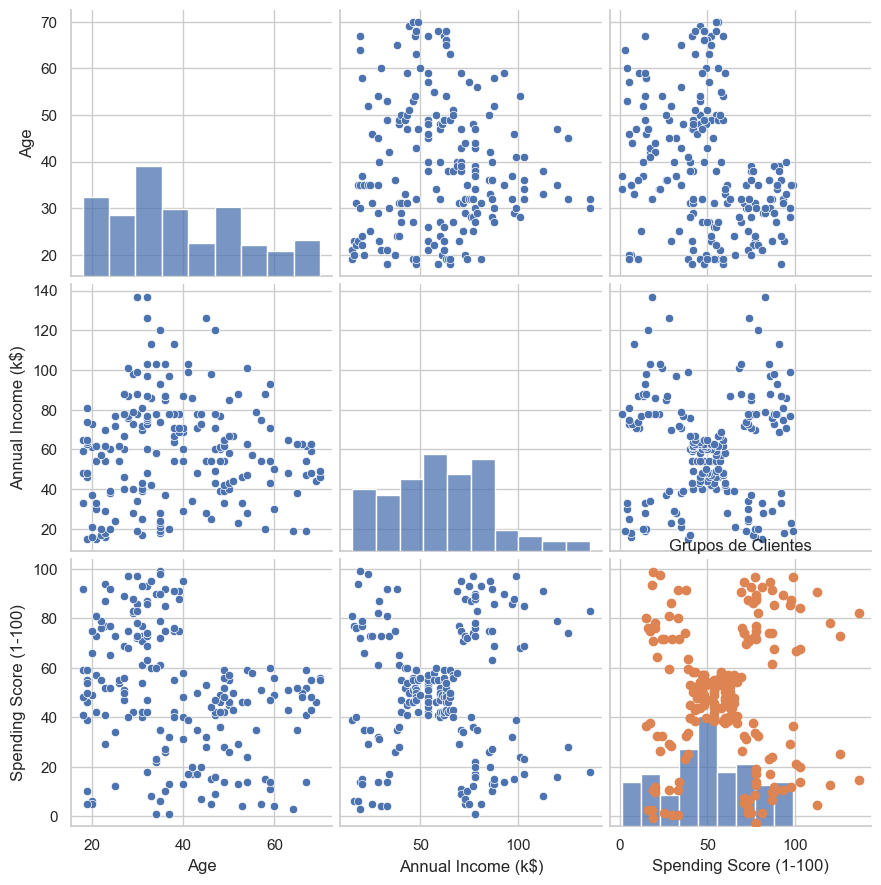

In [96]:
# Grafica antes del agrupamiento

plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros

K-MEANS

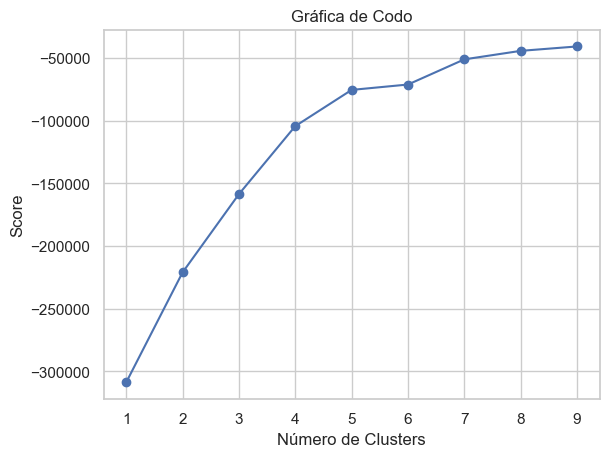

In [100]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [64]:
#Importando KMeans desde sklearn
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(dataset)
    wcss.append(km.inertia_)
    

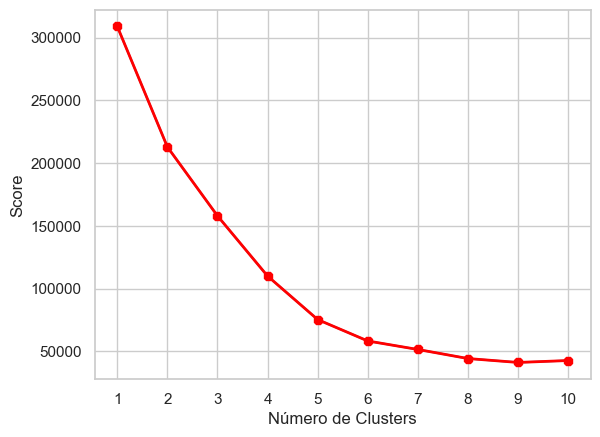

In [66]:
# gráfica de codo

plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("Número de Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Score")
plt.show()

In [102]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(dataset)

KMeans(n_clusters=5, random_state=0)

In [111]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
dataset["Cluster"] = Modelo.labels_ 
print (dataset)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo  Cluster
0     19                  15                      39      2        2
1     21                  15                      81      2        2
2     20                  16                       6      0        0
3     23                  16                      77      2        2
4     31                  17                      40      0        0
..   ...                 ...                     ...    ...      ...
195   35                 120                      79      1        1
196   45                 126                      28      3        3
197   32                 126                      74      1        1
198   32                 137                      18      3        3
199   30                 137                      83      1        1

[200 rows x 5 columns]


In [220]:
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Grupo,Cluster
0,19,15,39,2,2
1,21,15,81,2,2
2,20,16,6,0,0
3,23,16,77,2,2
4,31,17,40,0,0


In [222]:
#eliminar columna de datos etiqueta creada por error
dataset=dataset.drop(['Grupo'], axis=1)

In [224]:
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [226]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(dataset)
X = dataset.drop('Cluster', axis=1)
clusters = dataset['Cluster']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3771108731967625 |
| Indice Calinski Harabasz | 133.49030043802063 |
|  Indice Davies Bouldin   | 0.9845471043038023 |
+--------------------------+--------------------+


6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [228]:
dataset.Cluster.value_counts()

Cluster
4    53
0    50
1    39
3    34
2    24
Name: count, dtype: int64

In [234]:
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


In [236]:
centers = dataset.groupby('Cluster').mean()

In [238]:
centers

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,54.060000,40.460000,36.720000
1,32.692308,86.538462,82.128205
2,25.250000,25.833333,76.916667
3,41.647059,88.735294,16.764706
4,33.396226,58.056604,48.773585


In [246]:
km.cluster_centers_

array([[ 41.        , 109.7       ,  22.        ],
       [ 46.55172414,  56.37931034,  47.48275862],
       [ 26.33333333,  26.66666667,  93.66666667],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 48.75      ,  24.58333333,   9.58333333],
       [ 41.91666667,  80.        ,  14.58333333],
       [ 24.17241379,  57.44827586,  49.62068966],
       [ 37.5       ,  29.33333333,  34.58333333],
       [ 63.90909091,  53.04545455,  50.63636364],
       [ 25.23529412,  26.17647059,  73.23529412]])

In [250]:
print('silhouette_score de Cluster:',metrics.silhouette_score(dataset, km.labels_))

silhouette_score de Cluster: 0.3634597785230559


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

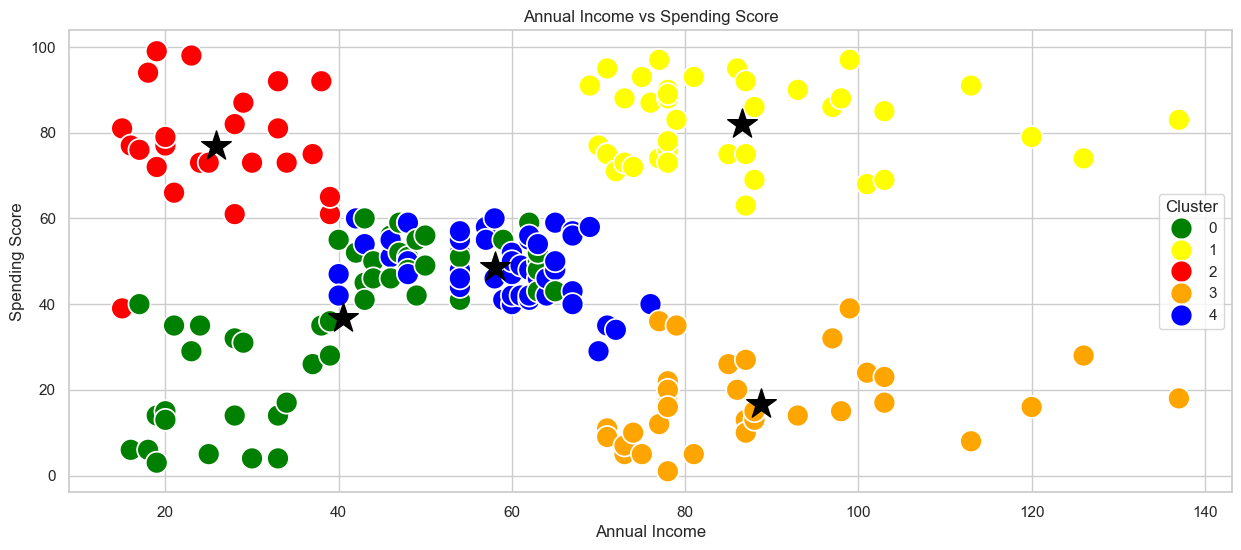

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
plt.figure(figsize=(15, 6))

# Pasar el conjunto de datos como parámetro de 'datos'
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', s=250, palette=['green', 'yellow', 'red', 'orange', 'blue'])

# centros de clúster, marcados con "*"
plt.scatter(x=centers['Annual Income (k$)'], y=centers['Spending Score (1-100)'], marker='*', s=500, c='black')

# agregar etiquetas
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

comprobacion a de 2do KMeans con 6 cluster

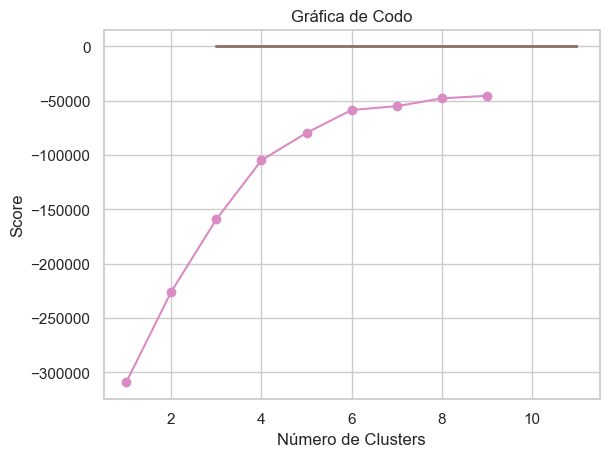

In [287]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [295]:
# Generación del modelo de Agrupamiento del modelo con K=6 (Es decir  6 clustes de agrupamiento) 

Modelo2 = KMeans(n_clusters=6, random_state=0)
Modelo2.fit(dataset)

KMeans(n_clusters=6, random_state=0)

In [301]:
Modelo2.labels_
dataset["Cluster6"] = Modelo2.labels_ 
print (dataset)

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster  Cluster6
0     19                  15                      39        2         5
1     21                  15                      81        2         2
2     20                  16                       6        0         5
3     23                  16                      77        2         2
4     31                  17                      40        0         5
..   ...                 ...                     ...      ...       ...
195   35                 120                      79        1         1
196   45                 126                      28        3         3
197   32                 126                      74        1         1
198   32                 137                      18        3         3
199   30                 137                      83        1         1

[200 rows x 5 columns]


In [303]:
# cluester 6 - Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(dataset)
X = dataset.drop('Cluster6', axis=1)
clusters = dataset['Cluster6']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.451029127477171  |
| Indice Calinski Harabasz | 166.3386253807079  |
|  Indice Davies Bouldin   | 0.7523775946588742 |
+--------------------------+--------------------+


In [308]:
dataset.Cluster6.value_counts()

Cluster6
0    44
1    39
4    38
3    34
2    23
5    22
Name: count, dtype: int64

In [310]:
centers2 = dataset.groupby('Cluster6').mean()

In [312]:
centers2

,Age,Annual Income (k$),Spending Score (1-100),Cluster
Cluster6,,,,
0,56.340909,53.704545,49.386364,1.363636
1,32.692308,86.538462,82.128205,1.000000
2,25.521739,26.304348,78.565217,2.000000
3,41.647059,88.735294,16.764706,3.000000
4,27.315789,57.500000,48.447368,4.000000
5,44.318182,25.772727,20.272727,0.090909


In [318]:
km.cluster_centers_

array([[5.61555556e+01, 5.33777778e+01, 4.90888889e+01, 1.33333333e+00],
       [4.78461538e+01, 8.83846154e+01, 2.54615385e+01, 3.07692308e+00],
       [2.63333333e+01, 2.66666667e+01, 9.36666667e+01, 2.00000000e+00],
       [3.25714286e+01, 8.22571429e+01, 8.21714286e+01, 1.00000000e+00],
       [3.33000000e+01, 2.25000000e+01, 2.63000000e+01, 2.00000000e-01],
       [2.70000000e+01, 5.67777778e+01, 4.93611111e+01, 4.00000000e+00],
       [2.52352941e+01, 2.61764706e+01, 7.32352941e+01, 2.00000000e+00],
       [5.40000000e+01, 2.75454545e+01, 1.33636364e+01, 4.44089210e-16],
       [3.86666667e+01, 1.17000000e+02, 1.83333333e+01, 3.00000000e+00],
       [3.69411765e+01, 7.68823529e+01, 1.13529412e+01, 3.05882353e+00],
       [3.37500000e+01, 1.24000000e+02, 8.17500000e+01, 1.00000000e+00]])

In [322]:
print('silhouette_score de Cluster6:',metrics.silhouette_score(dataset, km.labels_))

silhouette_score de Cluster6: 0.3794543342747738


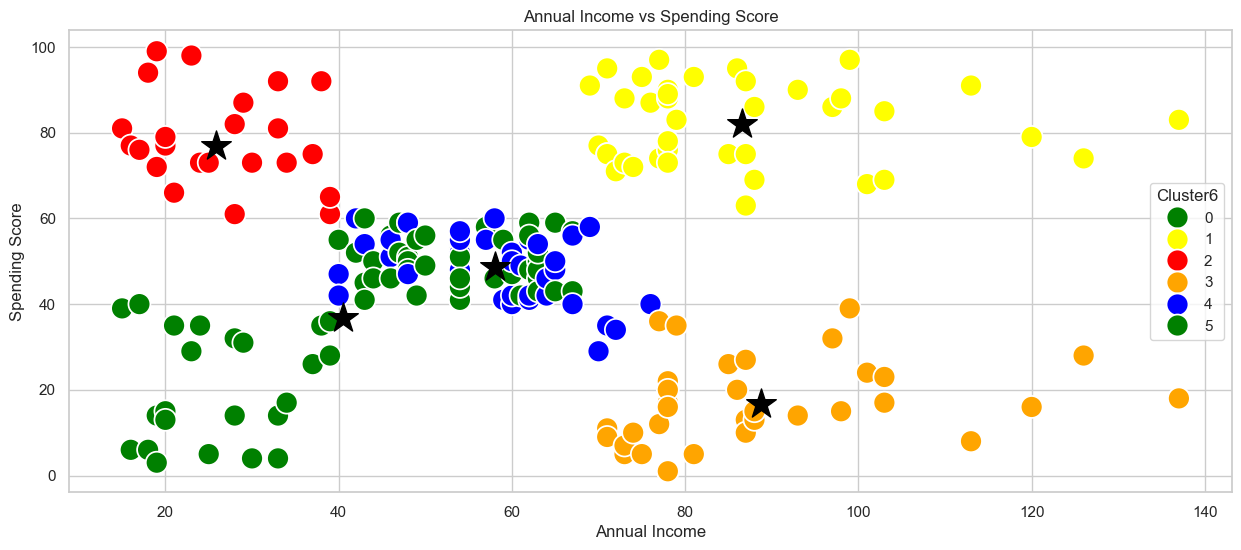

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
plt.figure(figsize=(15, 6))

# Pasar el conjunto de datos como parámetro de 'datos'
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster6', s=250, palette=['green', 'yellow', 'red', 'orange', 'blue'])

# centros de clúster, marcados con "*"
plt.scatter(x=centers['Annual Income (k$)'], y=centers['Spending Score (1-100)'], marker='*', s=500, c='black')

# agregar etiquetas
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

comprobacion a de 2do KMeans con 7 cluster

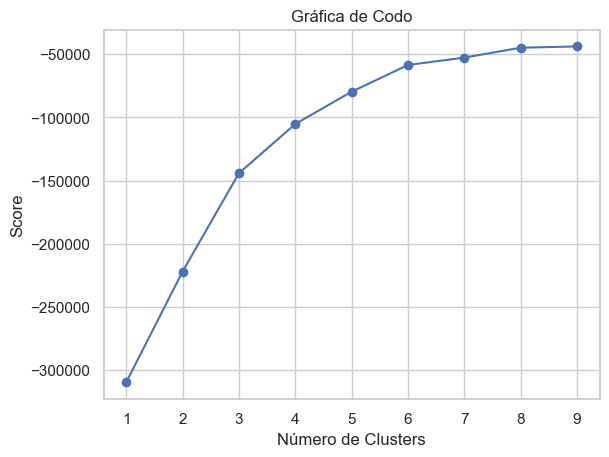

In [347]:
Nc3 = range(1, 13)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [349]:
# Generación del modelo de Agrupamiento del modelo con K=7 (Es decir  7 cluster de agrupamiento) 

Modelo3 = KMeans(n_clusters=7, random_state=0)
Modelo3.fit(dataset)

KMeans(n_clusters=7, random_state=0)

In [351]:
Modelo3.labels_
dataset["Cluster7"] = Modelo3.labels_ 
print (dataset)

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster  Cluster6  \
0     19                  15                      39        2         5   
1     21                  15                      81        2         2   
2     20                  16                       6        0         5   
3     23                  16                      77        2         2   
4     31                  17                      40        0         5   
..   ...                 ...                     ...      ...       ...   
195   35                 120                      79        1         1   
196   45                 126                      28        3         3   
197   32                 126                      74        1         1   
198   32                 137                      18        3         3   
199   30                 137                      83        1         1   

     Cluster7  
0           2  
1           5  
2           2  
3           5  
4           2  
.. 

In [353]:
# cluester 7 - Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(dataset)
X = dataset.drop('Cluster7', axis=1)
clusters = dataset['Cluster7']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.43783014455085373 |
| Indice Calinski Harabasz | 160.63268082264295  |
|  Indice Davies Bouldin   | 0.8274873571180252  |
+--------------------------+---------------------+


# Hierarchical clustering

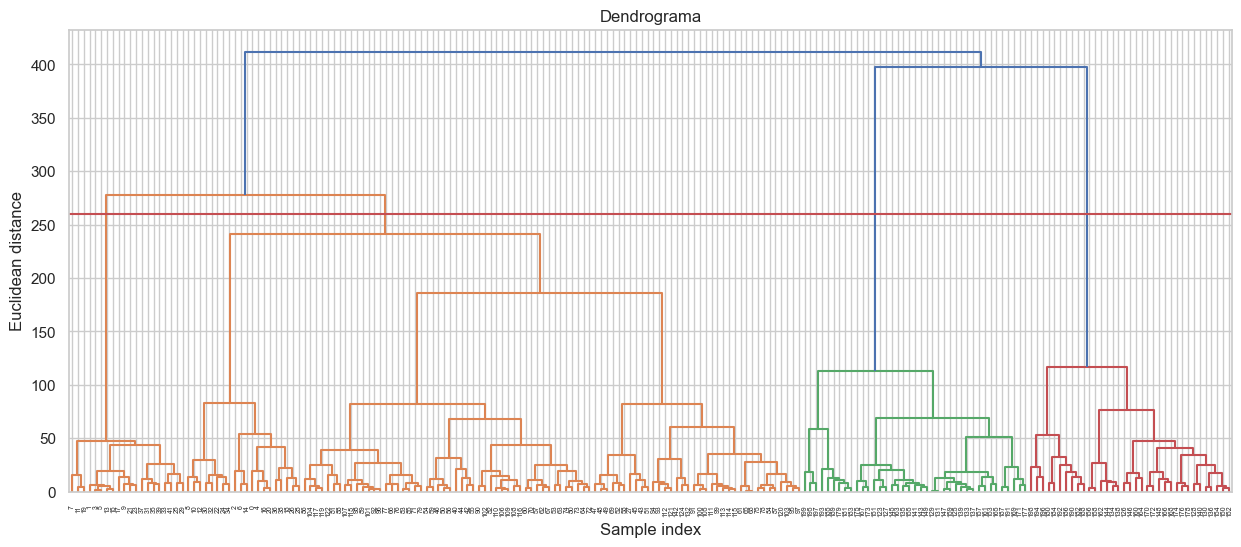

In [339]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(15, 6))
dendrogram(ward_clustering)
plt.axhline(y = 260, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [341]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [399]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan', 'orange' ]
asignar=[]
for row in labels:
    asignar.append(colores[row])

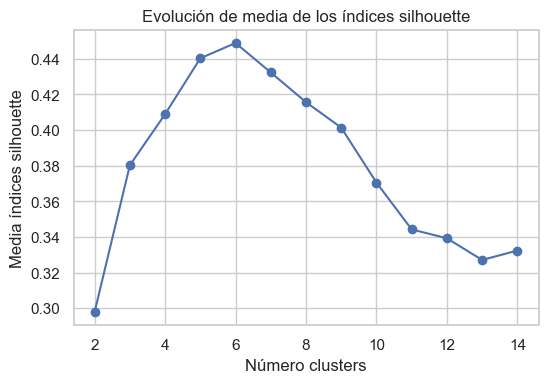

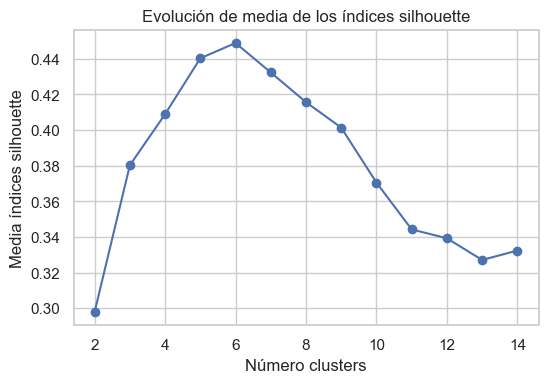

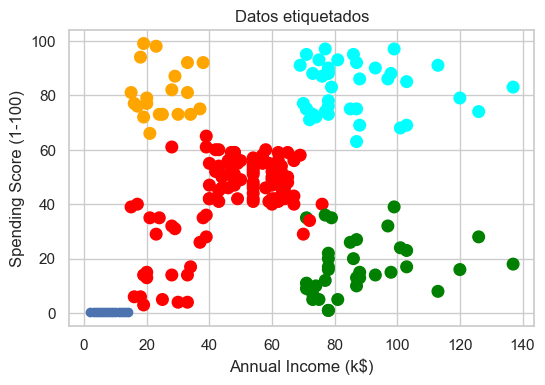

In [413]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# [["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [415]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(  
                    metric   = 'euclidean',  
                    linkage  = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [417]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.4088750653018886
Índice de Calinski-Harabasz: 123.35285255068004
Davies-Bouldin Index: 0.8373500442477994


In [419]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [421]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.2979831871872336
Índice de Calinski-Harabasz: 74.65308237940498
Davies-Bouldin Index: 1.5206815636725606


In [423]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6688550326275663, array([277.43621582,  83.58447007, 277.43621582, ..., 398.12890877,
        18.27566688, 398.12890877]))


# Conclusiones

Conclusión 1: El Coeficiente de silueta: esta métrica varía de -1 a 1, donde un valor cercano a 1 indica que los clústeres están bien separados y cohesionados. En búsqueda de esta aproximación al realizar las pruebas en diferentes puntos de clústeres donde:

k= 5, el resultado fue   0.3771108731967625. 

k= 6, el resultado fue   0.451029127477171.

k= 7, el resultado fue 0.43783014455085373.

Si notamos cuando lo lleve a 6 clustes mejoro en relación a k=5, aun cuando esta distante del 1, y al analizarlo en 7 clusters este hizo un efecto contrario, por ende a mi opinión el punto óptimo para este ejercicio es cuando k= 6, puesto que aun cuando esta distante el podemos decir que el coeficiente de silueta es constantemente alto para un número particular de clústeres k, sugiere que el k elegido proporciona un buen equilibrio entre la cohesión de los clústeres (qué tan cerca están los puntos en el mismo clúster) y la separación (qué tan separados están los clústeres entre sí). 


# ---------------------------------------------------------------------------------------#

Conclusión 2: Número óptimo de clústeres - Índice de Calinski-Harabasz: Este índice mide la relación entre la suma de la dispersión entre clústeres y la dispersión dentro de los clústeres.  Un índice de Calinski-Harabasz más alto indica clústeres mejor definidos. al realizar las pruebas en diferentes puntos de clústeres donde:

k= 5, el resultado fue   133.49030043802063

k= 6, el resultado fue   166.3386253807079

k= 7, el resultado fue   160.63268082264295 

Al analizar los valores de este índice en diferentes valores k, puede identificar el número óptimo de clústeres donde el índice alcanza su máximo. En este caso cuando k= 6, puesto que en este punto se puede determinar el k más apropiado para el algoritmo KMeans. 


# ---------------------------------------------------------------------------------------#

Conclusión 3: Evaluación de la calidad de los clústeres - Índice de Davies-Bouldin: Este índice evalúa la relación de similitud promedio de cada clúster con su clúster más similar. Un índice de Davies-Bouldin más bajo indica una mejor agrupación, al realizar las pruebas en diferentes puntos de clústeres donde:

k= 5, el resultado fue   0.9845471043038023

k= 6, el resultado fue   0.7523775946588742

k= 7, el resultado fue   0.8274873571180252 

en este punto se confirma que ell punto óptimo es cuando k= 6, ya que es el punto más bajo entre las mediciones y se sugiere este cuando los clústeres están más separados y son más distintos entre sí. Al comparar el índice de Davies-Bouldin con diferentes valores k, podemos evaluar la calidad de los clústeres formados. En ese sentido el índice disminuye a medida que aumenta k, puede indicar que más clústeres están proporcionando una mejor separación. 


# ---------------------------------------------------------------------------------------#

Conclusión 4: Al analizar estas tres métricas en conjunto, puede obtener una comprensión integral del rendimiento de la agrupación en clústeres. El coeficiente de Silhouette proporciona información sobre la cohesión y la separación de los clústeres, el índice de Calinski-Harabasz ayuda a identificar la cantidad óptima de clústeres y el índice de Davies-Bouldin evalúa la calidad general de la agrupación en clústeres. Juntos, guían la selección de la mejor configuración de agrupación en clústeres para su conjunto de datos.

# ---------------------------------------------------------------------------------------#